In [1]:
import neurokit2 as nk
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
root = Path().resolve().parent
test_path = root / "data/competition/competition_data/scenario_1/test"
noise_physiology_dir = root / "data/additional_testing/noise_test/scenario_1/test/physiology/"
examples_dir = root / "examples"

In [3]:
qualities = list()

for f_path in tqdm(test_path.glob("**/physiology/*.csv")):
    ecg = pd.read_csv(f_path, usecols=['ecg'])['ecg']
    ecg_cleaned = nk.ecg.ecg_clean(ecg, sampling_rate=1000)
    quality = nk.ecg_quality(ecg_cleaned, sampling_rate=1000)
    if (qm := quality.mean()) > 0.9:
        qualities.append((qm, f_path))

0it [00:00, ?it/s]

240it [00:12, 19.18it/s]


In [4]:
srt = sorted(qualities, reverse=True, key=lambda x: x[0])
srt

[(0.9280794695697495,
  PosixPath('/home/bperz/EPIC/EPiC-2023-additional-testing/data/competition/competition_data/scenario_1/test/physiology/sub_12_vid_9.csv')),
 (0.925693664358512,
  PosixPath('/home/bperz/EPIC/EPiC-2023-additional-testing/data/competition/competition_data/scenario_1/test/physiology/sub_12_vid_20.csv')),
 (0.9249666860881216,
  PosixPath('/home/bperz/EPIC/EPiC-2023-additional-testing/data/competition/competition_data/scenario_1/test/physiology/sub_8_vid_11.csv')),
 (0.9184141295361821,
  PosixPath('/home/bperz/EPIC/EPiC-2023-additional-testing/data/competition/competition_data/scenario_1/test/physiology/sub_28_vid_13.csv')),
 (0.9172472158408059,
  PosixPath('/home/bperz/EPIC/EPiC-2023-additional-testing/data/competition/competition_data/scenario_1/test/physiology/sub_29_vid_14.csv')),
 (0.914557337813668,
  PosixPath('/home/bperz/EPIC/EPiC-2023-additional-testing/data/competition/competition_data/scenario_1/test/physiology/sub_4_vid_14.csv')),
 (0.9132668957278571,

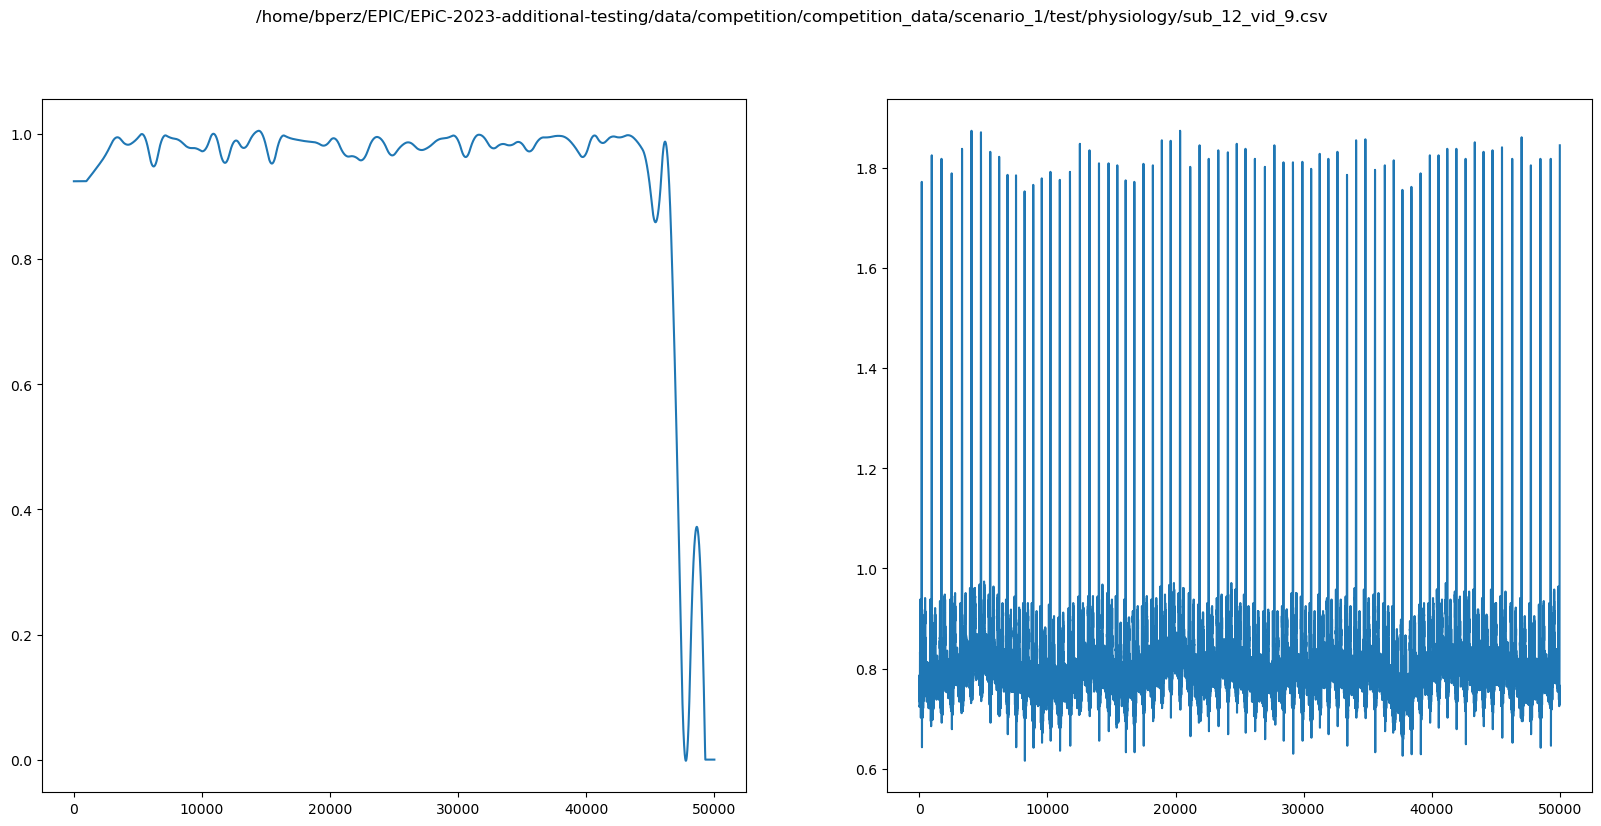

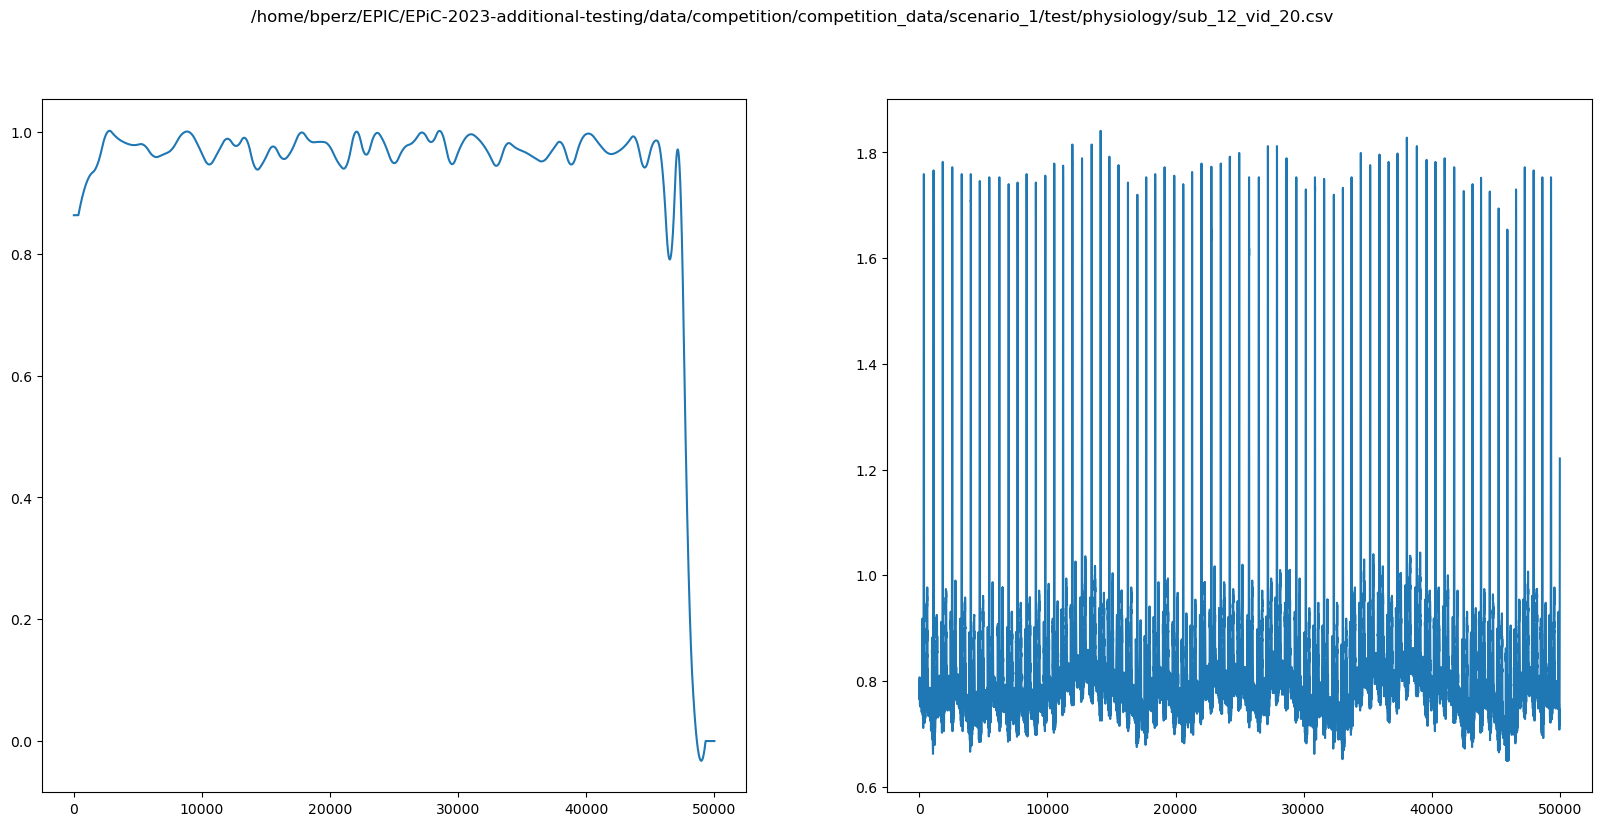

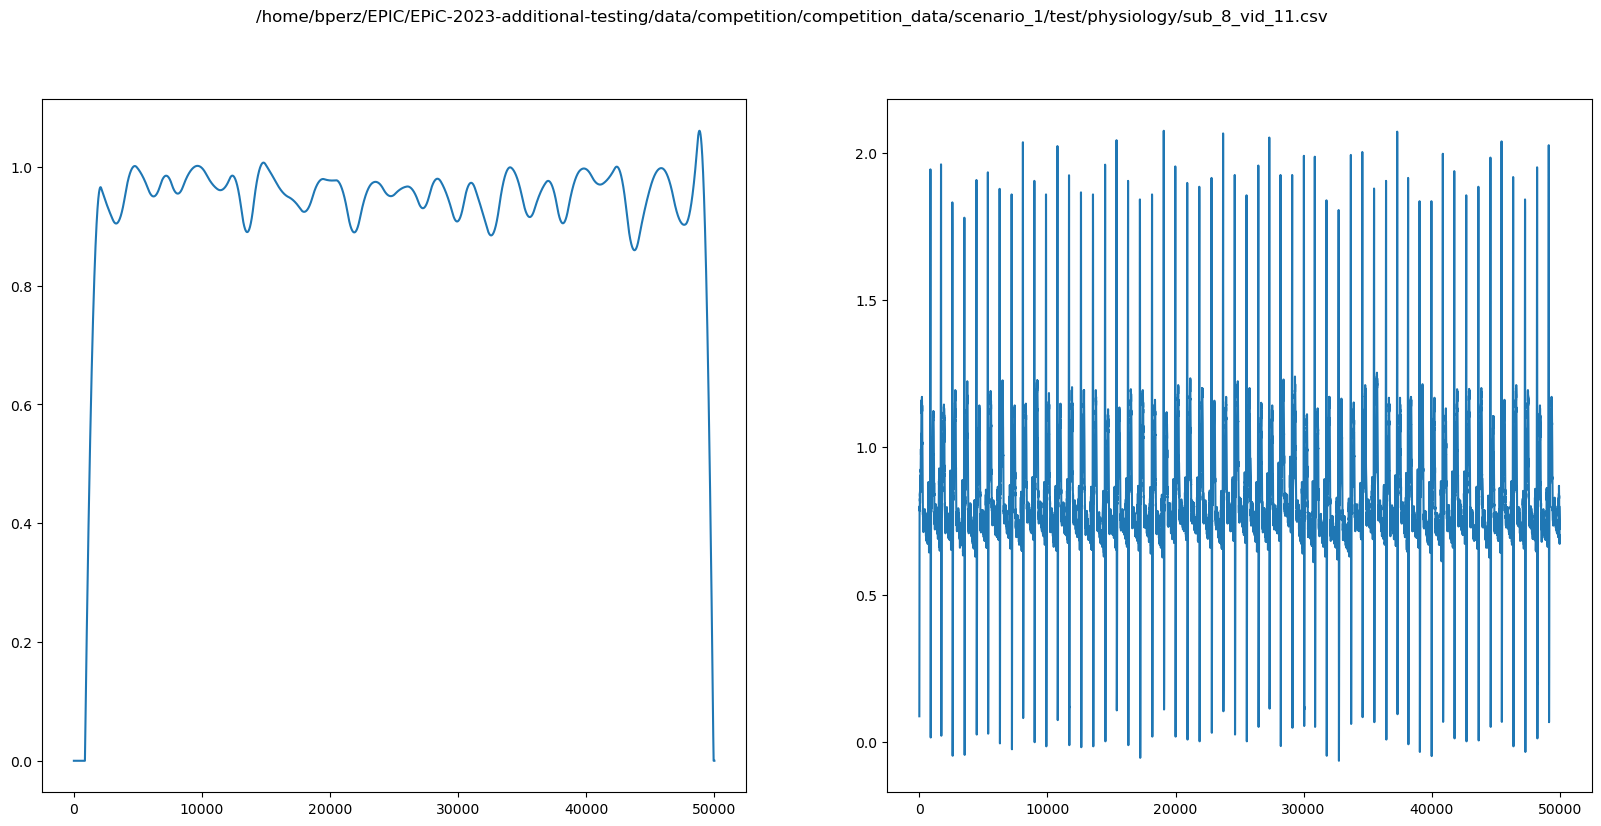

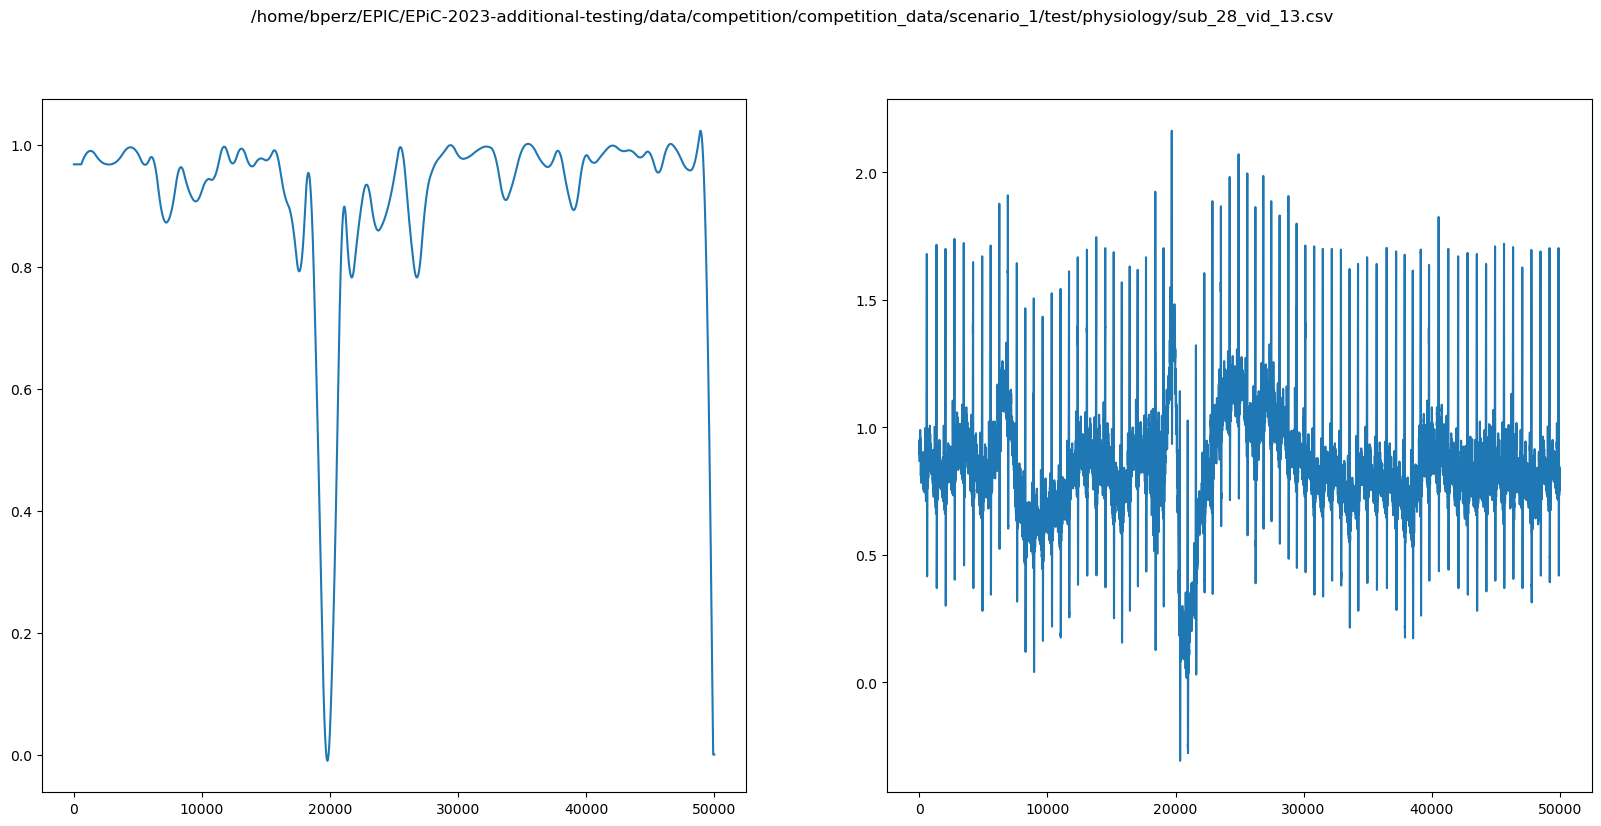

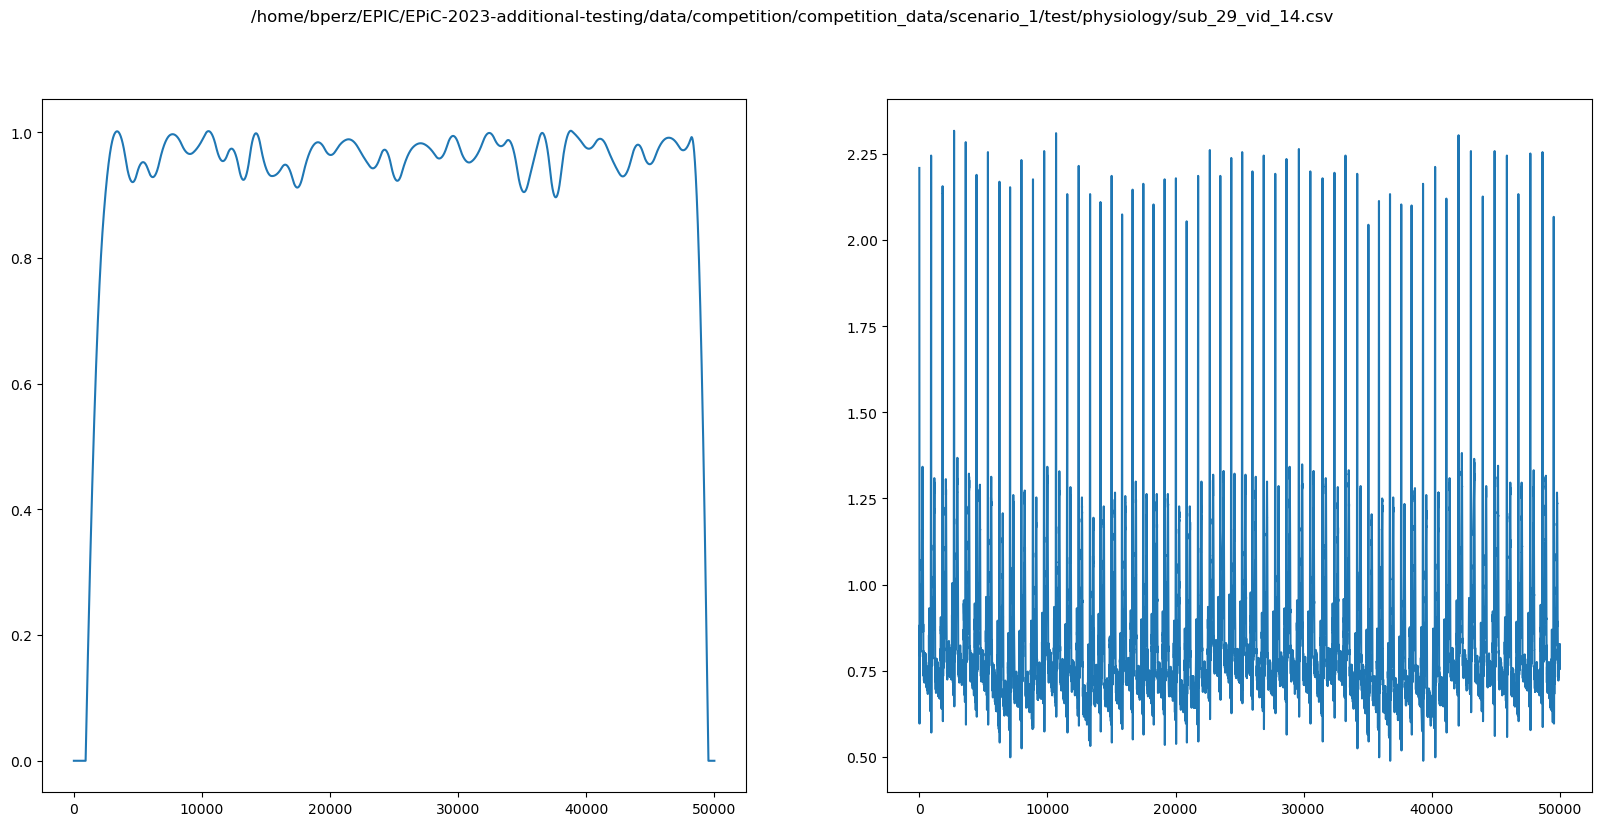

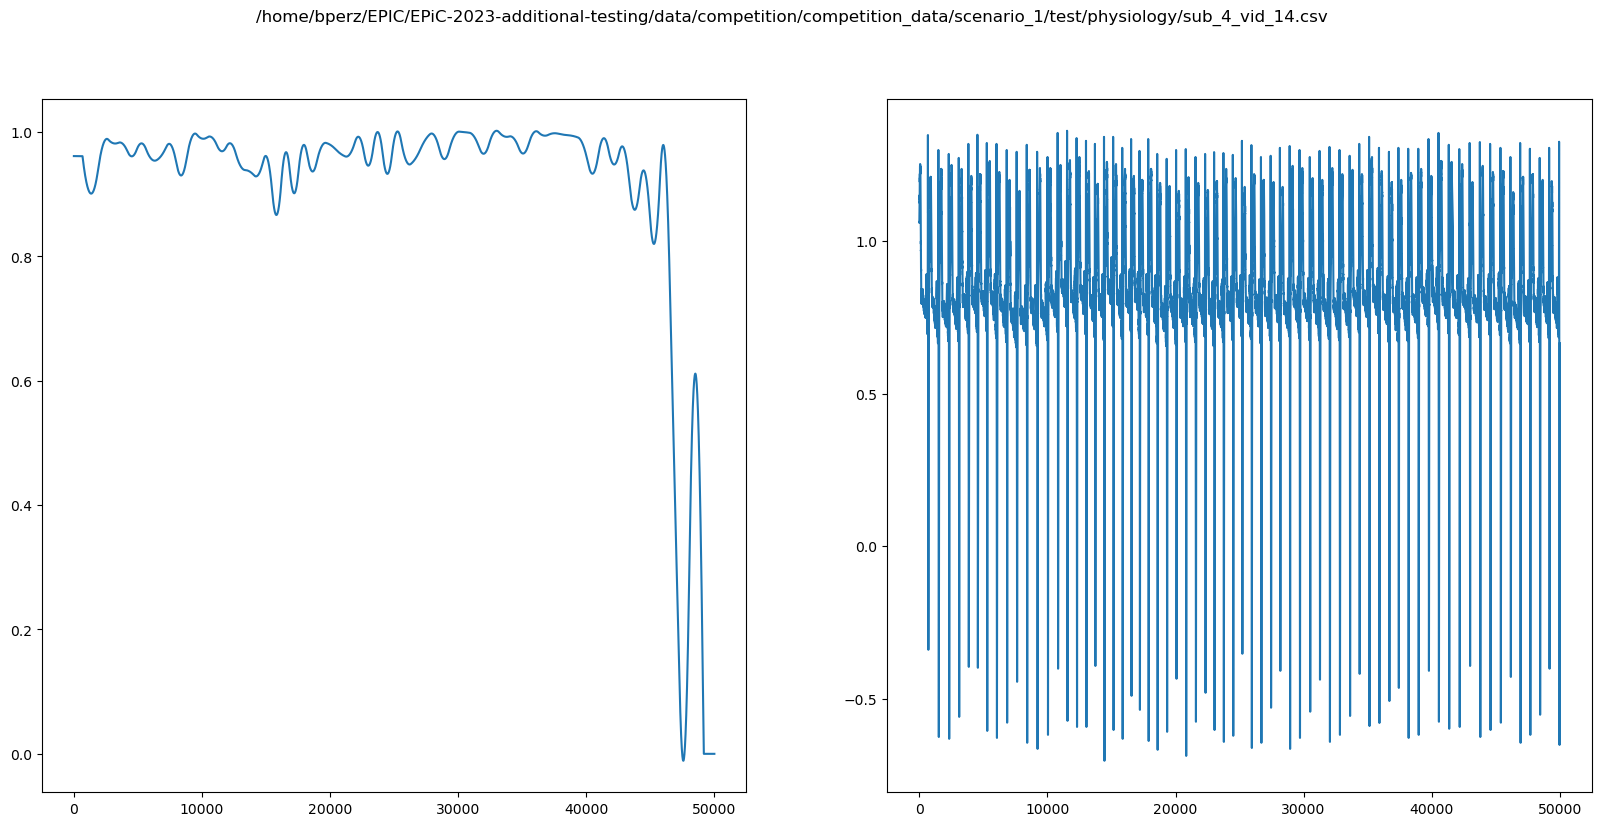

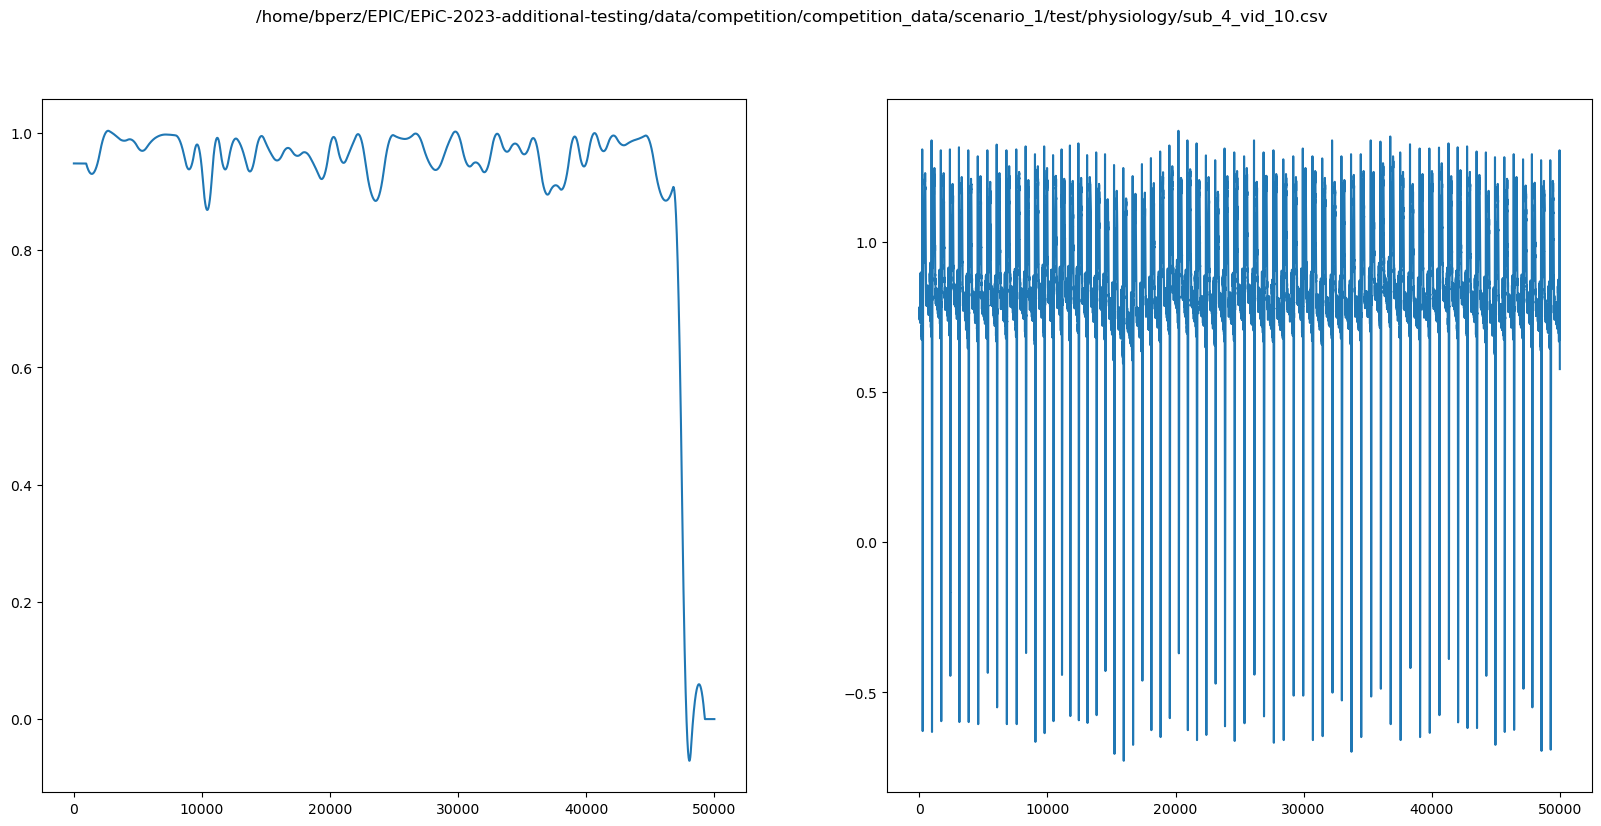

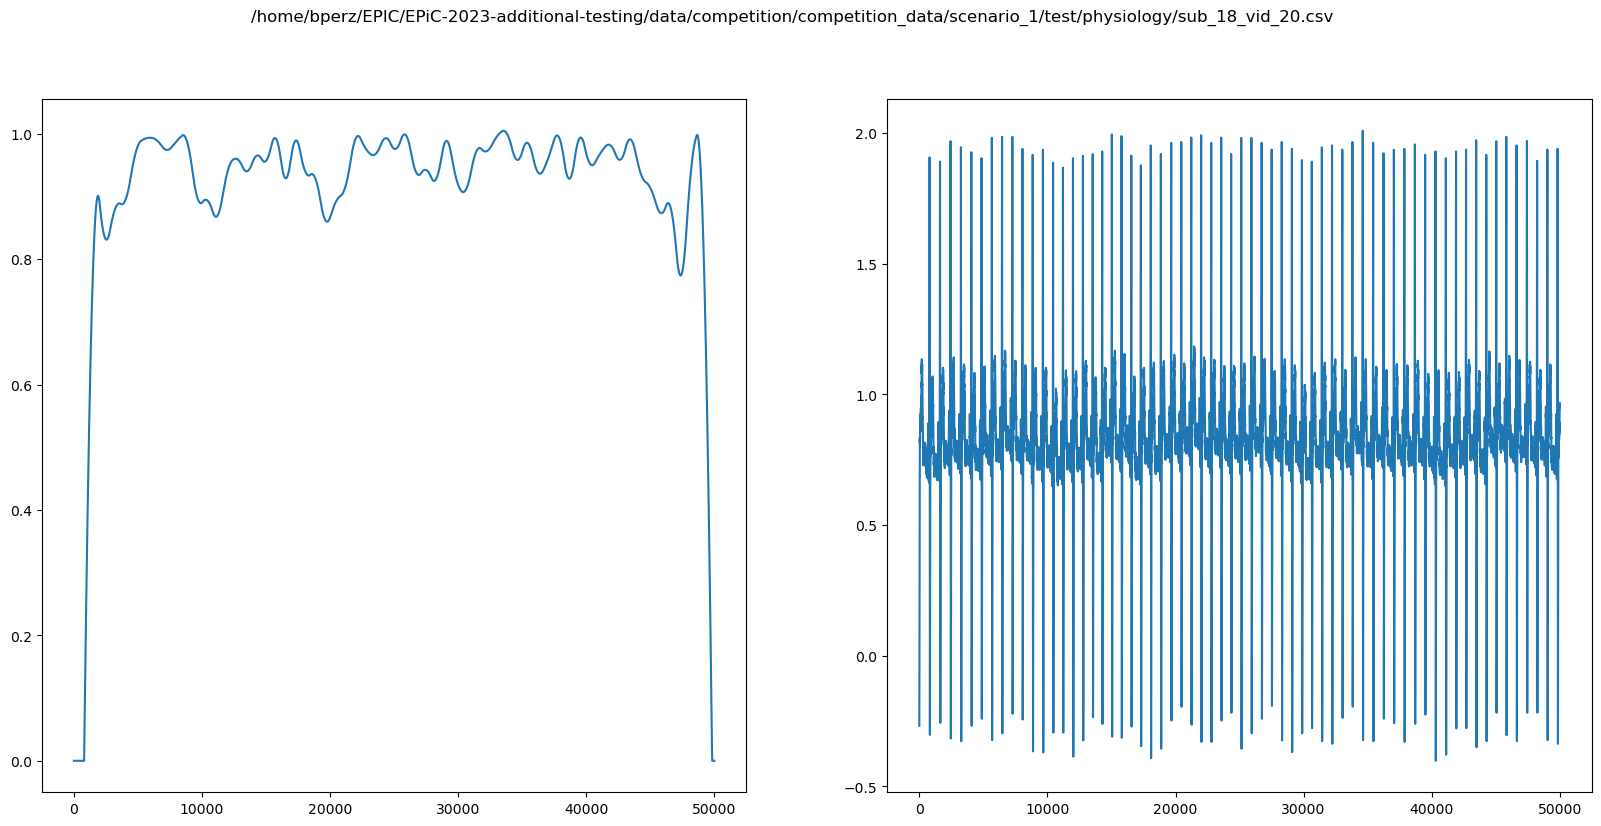

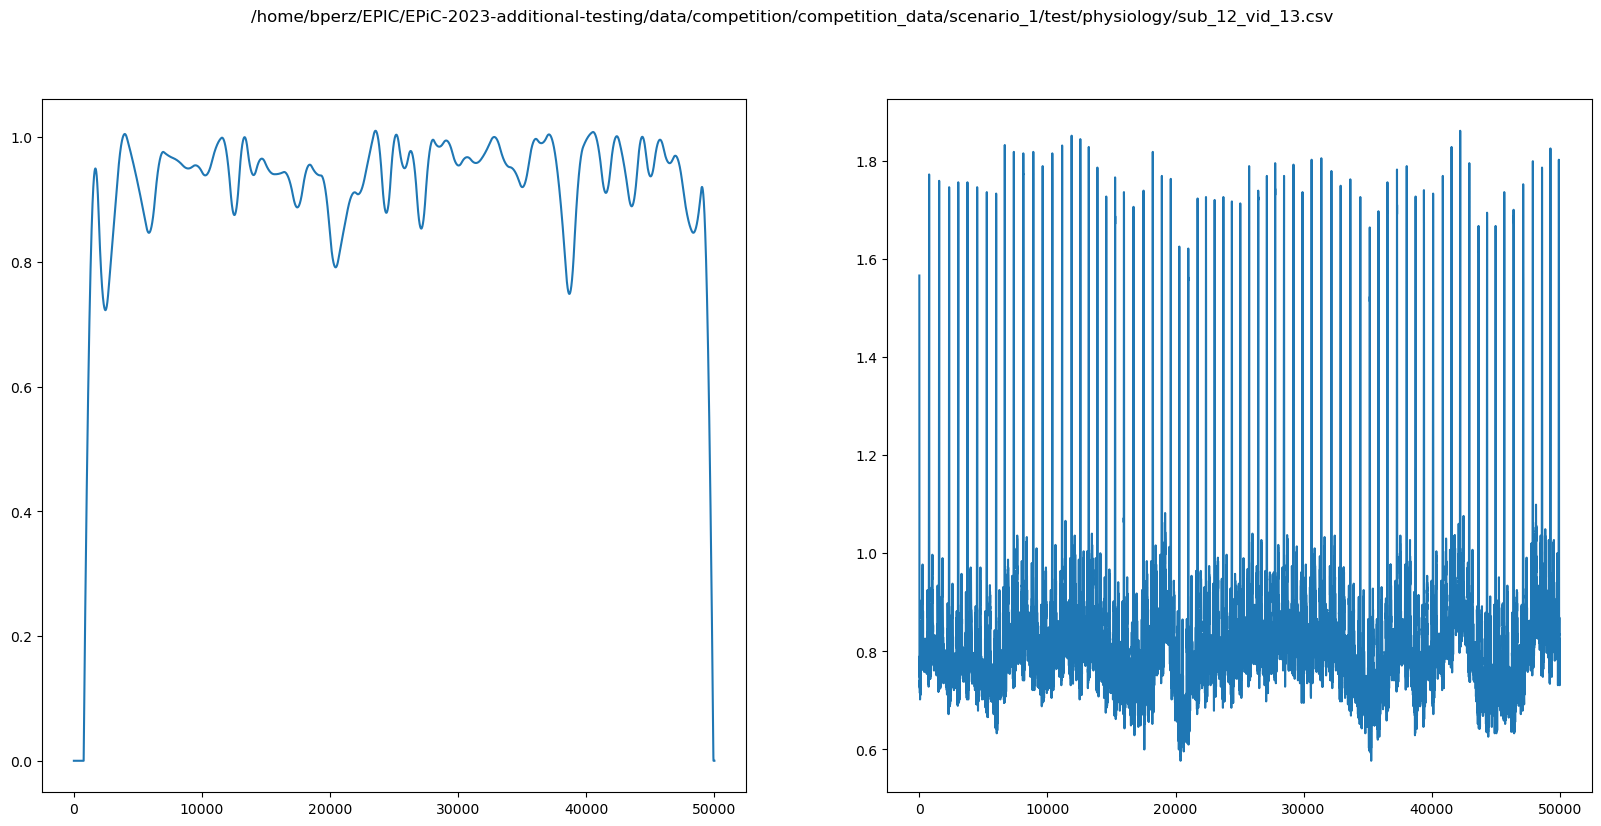

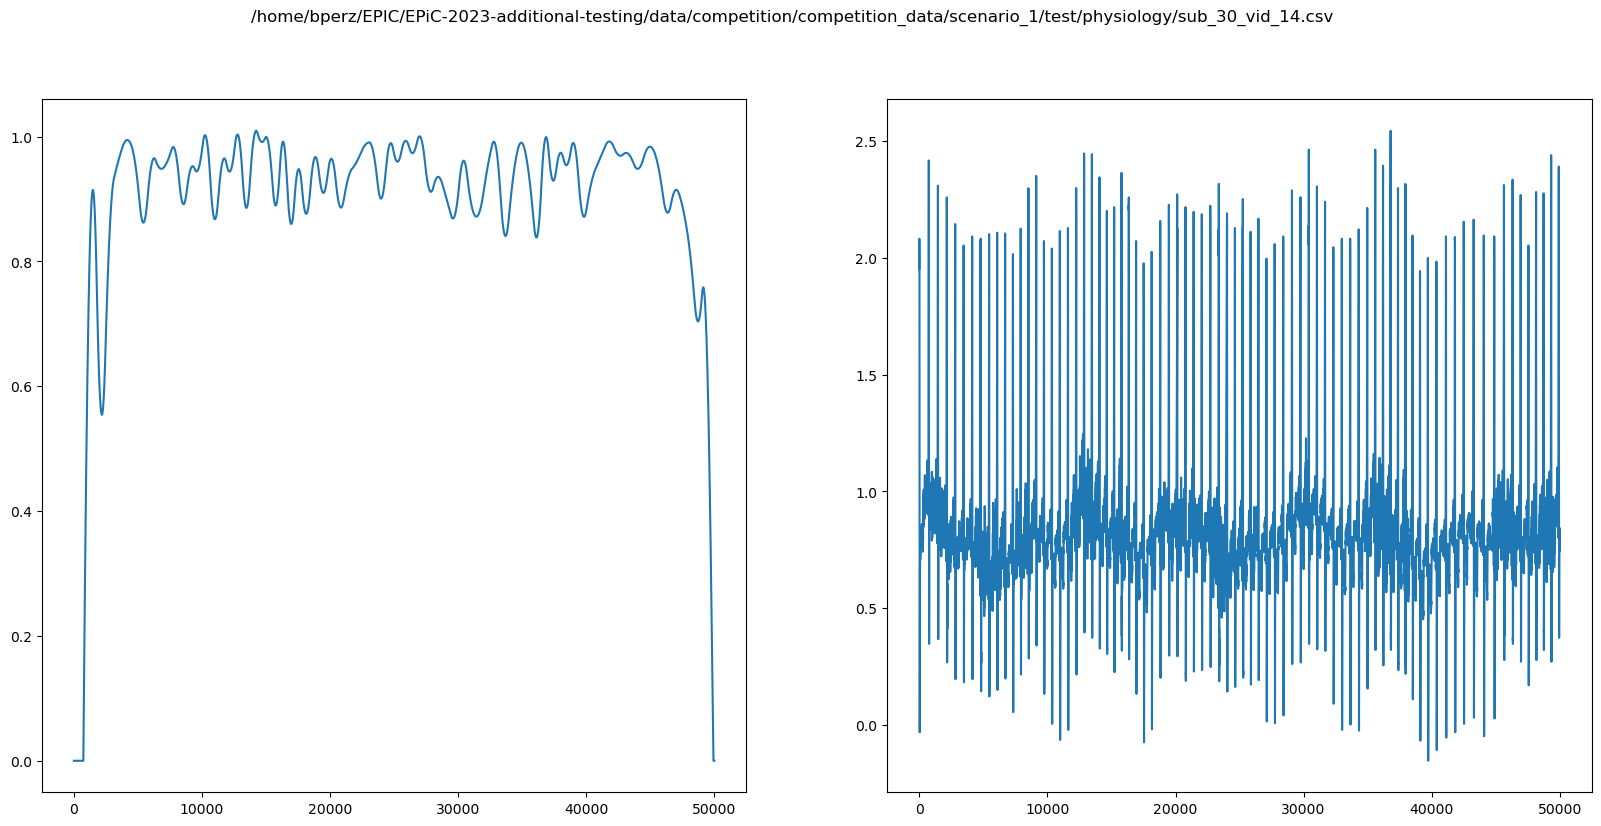

In [5]:
for quality, fp in srt:
    df = pd.read_csv(fp, usecols=['time', 'ecg'])
    ecg = df['ecg']
    ecg_cleaned = nk.ecg.ecg_clean(ecg, sampling_rate=1000)
    quality = nk.ecg_quality(ecg_cleaned, sampling_rate=1000)
    plt.figure(figsize=(20,9))
    plt.suptitle(fp)
    plt.subplot(121)
    plt.plot(quality)
    plt.subplot(122)
    plt.plot(ecg)

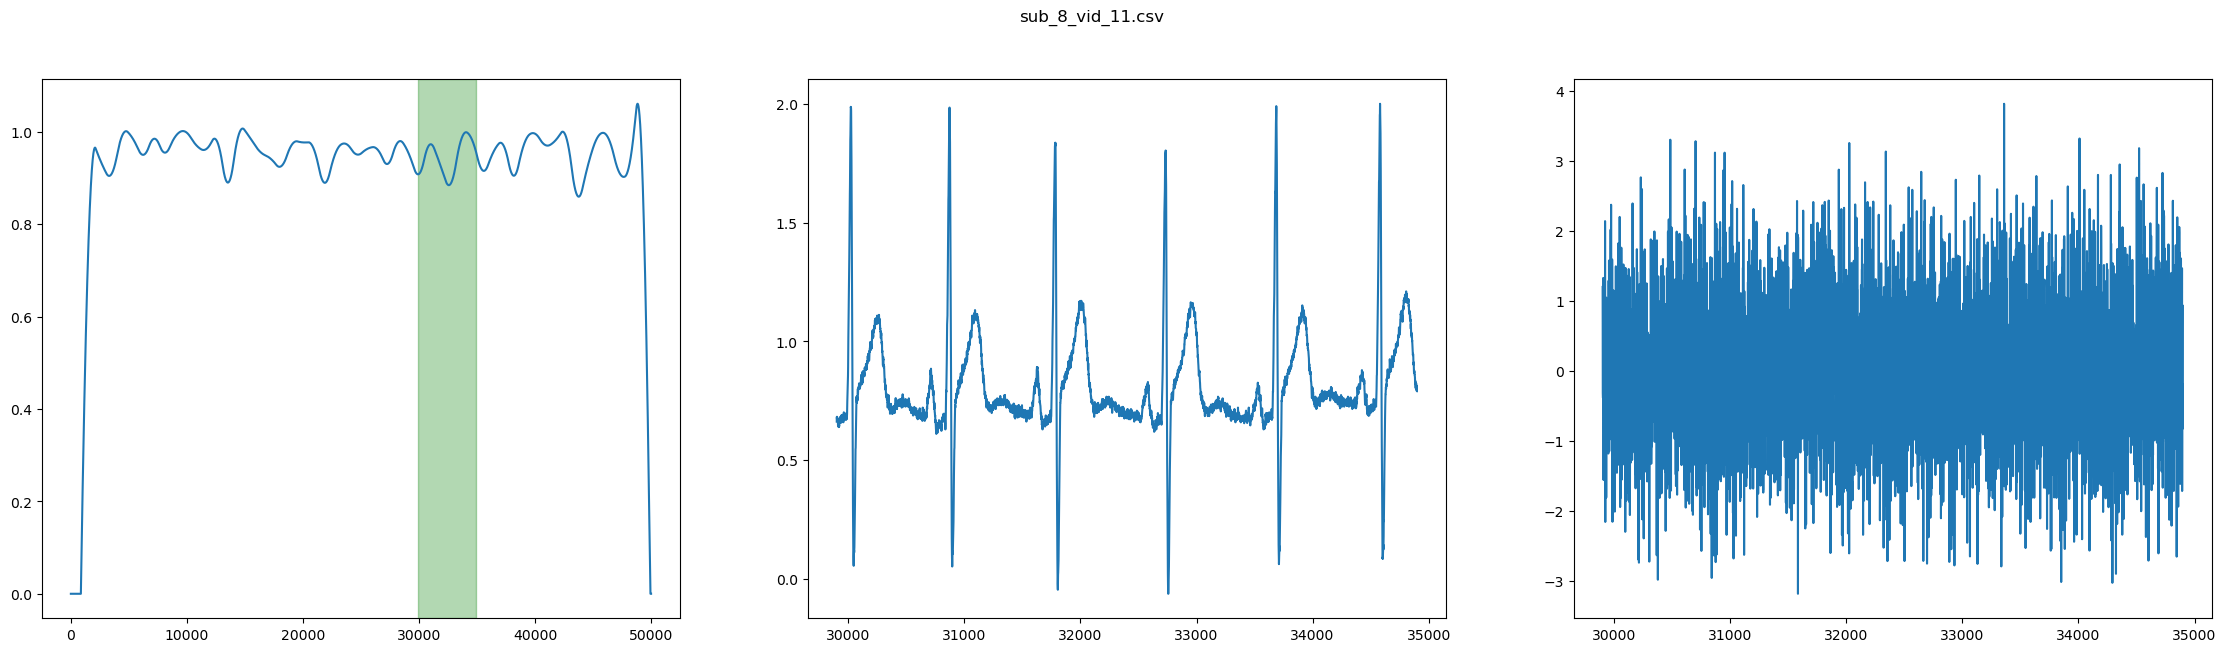

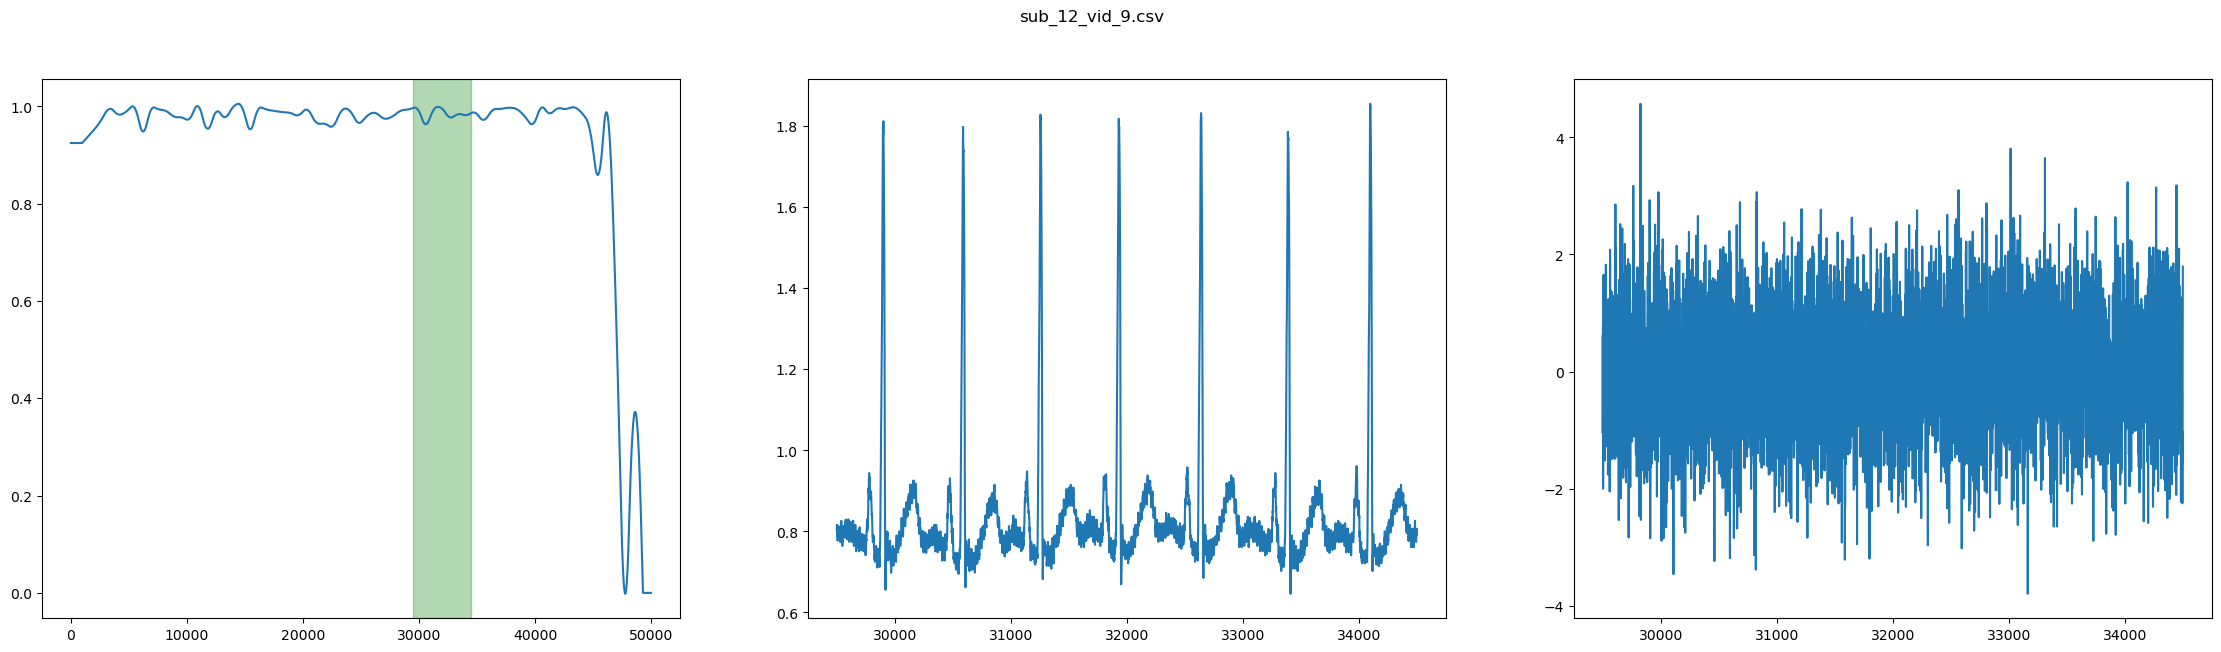

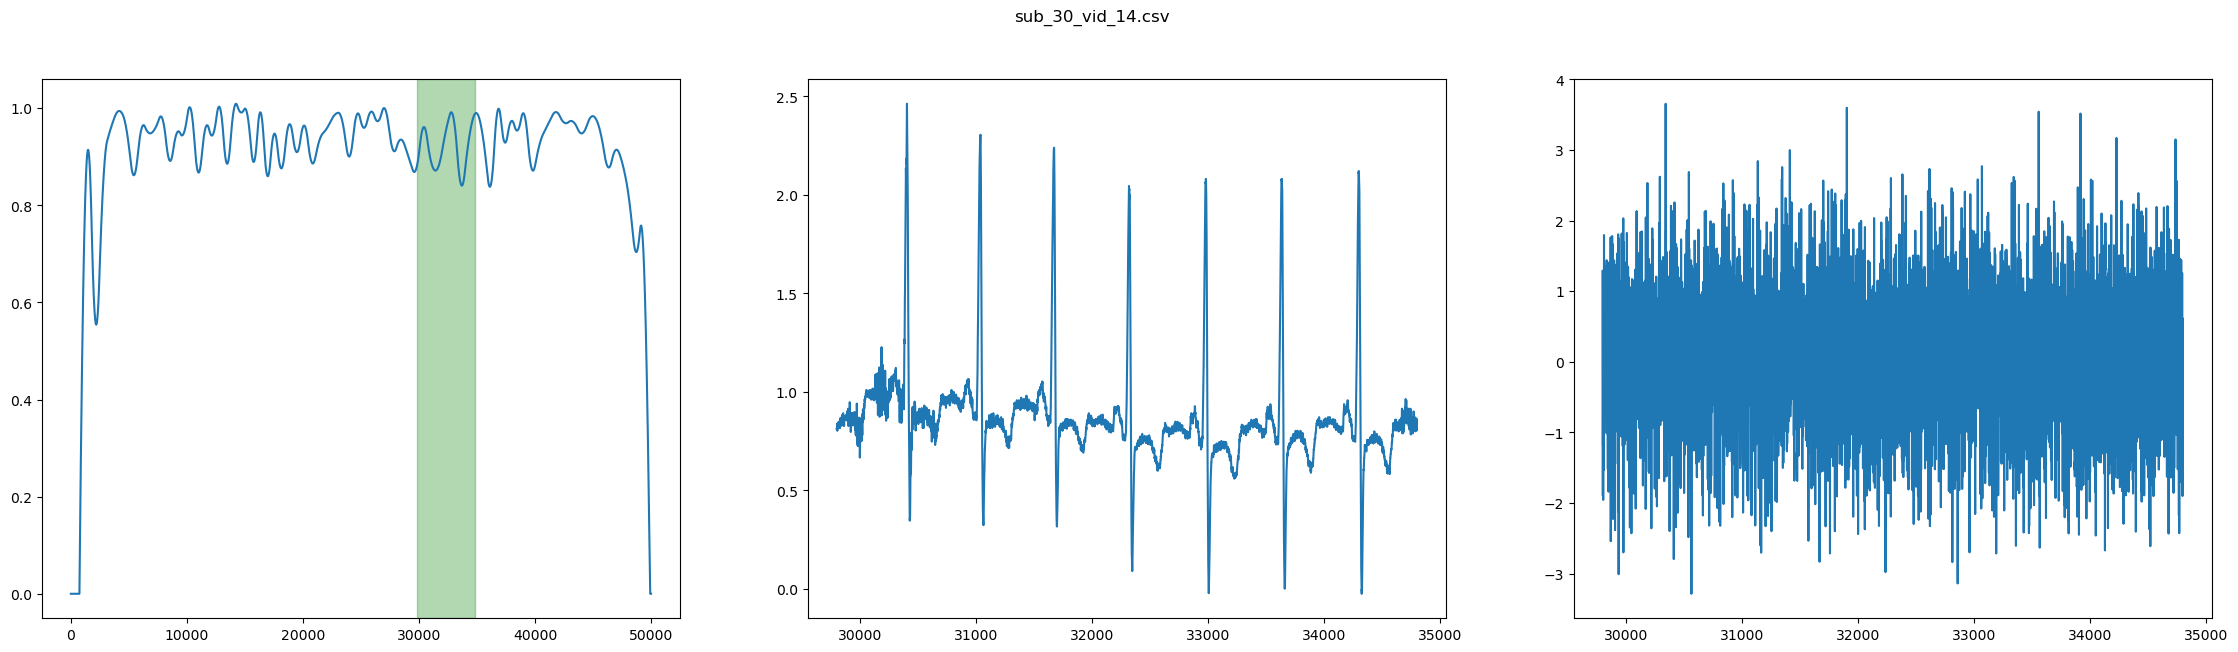

In [6]:
for file_name, rl, rr in (("sub_8_vid_11.csv", 29900, 34900), ("sub_12_vid_9.csv", 29500, 34500), ("sub_30_vid_14.csv", 29800, 34800)):
    fp = test_path / "physiology" / file_name
    df = pd.read_csv(fp, usecols=['time', 'ecg'])
    ecg = df['ecg']
    ecg_cleaned = nk.ecg.ecg_clean(ecg, sampling_rate=1000)
    quality = nk.ecg_quality(ecg_cleaned, sampling_rate=1000)
    ecg_noise = pd.read_csv(noise_physiology_dir / fp.name, usecols=['ecg'])['ecg']
    plt.figure(figsize=(28,7))
    plt.suptitle(file_name)
    plt.subplot(131)
    plt.axvspan(rl, rr, color='green', alpha=0.3)
    plt.plot(quality)
    plt.subplot(132)
    plt.plot(ecg[rl:rr])
    plt.subplot(133)
    plt.plot(ecg_noise[rl:rr])
    long_df = pd.DataFrame({"time": df['time'], "ecg": ecg, "noise": ecg_noise})
    short_df = pd.DataFrame({"time": df['time'][rl:rr], "ecg": ecg[rl:rr], "noise": ecg_noise[rl:rr]})
    examples_dir.mkdir(parents=True, exist_ok=True)
    long_df.to_csv(examples_dir / f"ecg_s1-test_{fp.stem}_long.csv", index=False)
    short_df.to_csv(examples_dir / f"ecg_s1-test_{fp.stem}_short.csv", index=False)